## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('mushrooms (1).csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Data Analysis 

In [3]:
data.shape

(8124, 23)

In [4]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


[]

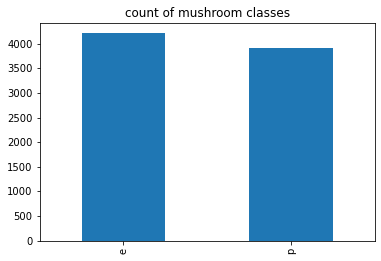

In [7]:
data['class'].value_counts().plot(kind='bar')
plt.title('count of mushroom classes')
plt.plot()

## Data Encoding 

In [8]:
data=pd.get_dummies(data,columns=['bruises','gill-size','stalk-shape','veil-type'])

In [9]:
data.drop(['bruises_t','gill-size_n','stalk-shape_t'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['class', 'cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat']
for x in cols:
    data[x]=le.fit_transform(data[x])

In [11]:
data.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-color                  int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
bruises_f                   uint8
gill-size_b                 uint8
stalk-shape_e               uint8
veil-type_p                 uint8
dtype: object

In [12]:
X=data.drop(['class'],axis=1)
Y=data['class']

## Scaling the data

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.set_axis(['cap-shape', 'cap-surface', 'cap-color', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-color', 'stalk-root',
       'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'bruises_f', 'gill-size_b', 'stalk-shape_e', 'veil-type_p'],axis='columns',inplace=True)


In [14]:
X.head()

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,...,veil-color,ring-number,ring-type,spore-print-color,population,habitat,bruises_f,gill-size_b,stalk-shape_e,veil-type_p
0,1.029712,0.140128,-0.198250,0.881938,0.162896,-0.438864,-0.228998,1.781460,0.683778,0.586385,...,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,-1.185917,-1.494683,1.144806,0.0
1,1.029712,0.140128,1.765874,-1.970316,0.162896,-0.438864,-0.228998,0.838989,0.683778,0.586385,...,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730,-1.185917,0.669038,1.144806,0.0
2,-2.087047,0.140128,1.373049,-0.544189,0.162896,-0.438864,0.053477,0.838989,0.683778,0.586385,...,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149,-1.185917,0.669038,1.144806,0.0
3,1.029712,0.953270,1.373049,0.881938,0.162896,-0.438864,0.053477,1.781460,0.683778,0.586385,...,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028,-1.185917,-1.494683,1.144806,0.0
4,1.029712,0.140128,-0.591075,0.406562,0.162896,2.278612,-0.228998,1.781460,0.683778,0.586385,...,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730,0.843230,0.669038,-0.873511,0.0


## Plotting correlation heatmap

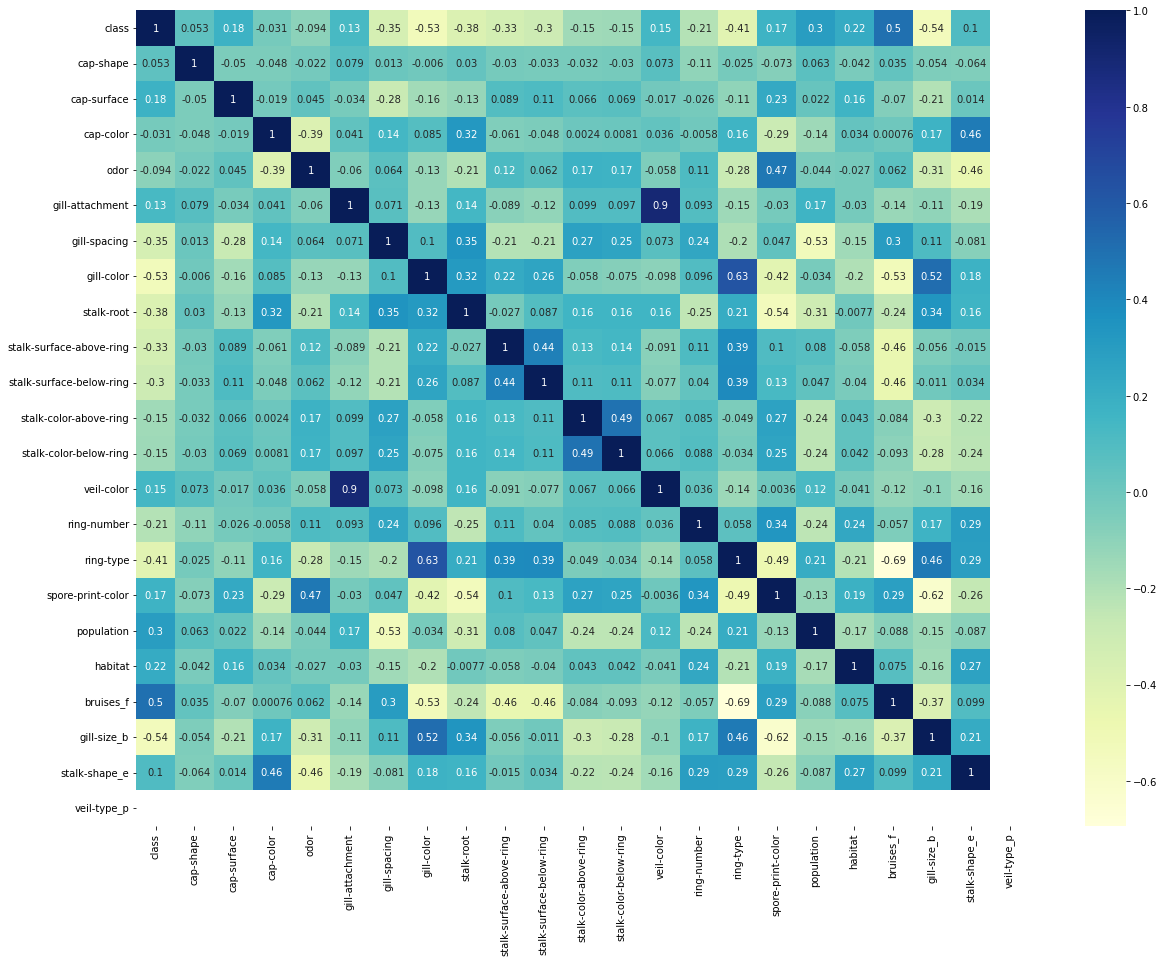

In [15]:
datcor=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(datcor,cmap='YlGnBu',annot=True)
plt.show()

In [16]:
X.drop(['cap-shape','cap-color','odor'],axis=1,inplace=True)
X.shape

(8124, 19)

## Splitting the dataset

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print('train data x shape',X_train.shape)
print('train data y shape',Y_train.shape)


train data x shape (6499, 19)
train data y shape (6499,)


## Linear Regression Model

In [18]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(predictions)
from sklearn.metrics import mean_squared_error,confusion_matrix
print('MSE is:',mean_squared_error(Y_test,predictions))

[-0.14271205  0.86288764  1.03668547 ...  1.14288329  0.98229333
  0.87963077]
MSE is: 0.06869218448194782


## Decision Tree Classifier Model

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
y_p=dt.predict(X_test)
print('Accuracy score:',accuracy_score(Y_test,y_p))
print('confusion matrix',confusion_matrix(Y_test,y_p))

Accuracy score: 1.0
confusion matrix [[843   0]
 [  0 782]]


## SVM Model 

In [20]:
from sklearn.svm import SVC
svm_lin=SVC(kernel='linear')
svm_lin.fit(X_train,Y_train)
y_pre=svm_lin.predict(X_test)
print('accuracy score:',accuracy_score(Y_test,y_pre))
print('confusion matrix',confusion_matrix(Y_test,y_pre))

accuracy score: 0.9735384615384616
confusion matrix [[829  14]
 [ 29 753]]


## Random Forest Classifier Model 

In [21]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
yp=rfc.predict(X_test)
print('accuracy is:',accuracy_score(Y_test,yp))
print('confusion matrix',confusion_matrix(Y_test,yp))

accuracy is: 1.0
confusion matrix [[843   0]
 [  0 782]]


## KMeans Clustering Model 

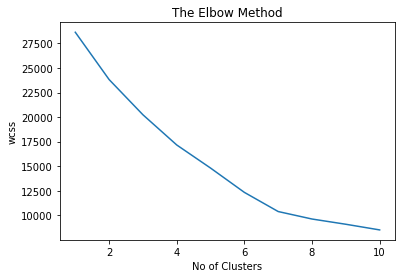

In [22]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(X_test,Y_test)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()
    

In [23]:
kmn=KMeans(n_clusters=7,init="k-means++",random_state=42)
y_means=kmn.fit_predict(X_test)
print('accuracy is:',accuracy_score(Y_test,y_means))
print('confusion matrix',confusion_matrix(Y_test,y_means))

accuracy is: 0.28492307692307695
confusion matrix [[367 171  13   4  40 154  94]
 [ 59  96 339 272   2   0  14]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]]


## Gaussian Naive Bayes Classifier Model 

In [24]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
classifiedd=classifier.predict(X_test)

In [25]:
cm=confusion_matrix(Y_test,classifiedd)
print('accuracy score:',accuracy_score(Y_test,classifiedd))
print('confusion matrix',cm)

accuracy score: 0.92
confusion matrix [[771  72]
 [ 58 724]]


## Bernoulli Naive Bayes Classifier Model 

In [26]:
from sklearn.naive_bayes import BernoulliNB
clsfr=BernoulliNB()
clsfr.fit(X_train,Y_train)
bnbp=clsfr.predict(X_test)
print('accuracy score:',accuracy_score(Y_test,bnbp))
print('confusion matrix:',confusion_matrix(Y_test,bnbp))

accuracy score: 0.8812307692307693
confusion matrix: [[808  35]
 [158 624]]
